In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as  plt
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout,GlobalAveragePooling1D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

In [2]:
#데이터 구문 분석 및 준비 : 다음 셀은 csv 파일을 구문 분석하고 완전히 연결된 신경망을 훈련하는 데 사용할 형식으로 변환합니다.
#.csv 형식으로 수집 한 제스처 데이터로 제스처 목록을 업데이트합니다.

print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# 노트북이 실행될 때마다 동일한 난수
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
GESTURES = [
    "punch","flex","triangle","star","square","shaking",
    "a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"
]

SAMPLES_PER_GESTURE = 119

NUM_GESTURES = len(GESTURES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")
  
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  
  df = pd.read_csv(gesture + ".csv")

  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
  
  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalize the input data, between 0 to 1:
      # - acceleration is between: -4 to +4
      # - gyroscope is between: -2000 to +2000
      tensor += [
          (df['aX'][index] + 4) / 8,
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000
      ]


    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")
print(inputs.shape)
print(outputs.shape)


TensorFlow version = 2.3.1

Processing index 0 for gesture 'punch'.
	There are 30 recordings of the punch gesture.
Processing index 1 for gesture 'flex'.
	There are 30 recordings of the flex gesture.
Processing index 2 for gesture 'triangle'.
	There are 30 recordings of the triangle gesture.
Processing index 3 for gesture 'star'.
	There are 30 recordings of the star gesture.
Processing index 4 for gesture 'square'.
	There are 30 recordings of the square gesture.
Processing index 5 for gesture 'shaking'.
	There are 30 recordings of the shaking gesture.
Processing index 6 for gesture 'a'.
	There are 30 recordings of the a gesture.
Processing index 7 for gesture 'b'.
	There are 30 recordings of the b gesture.
Processing index 8 for gesture 'c'.
	There are 30 recordings of the c gesture.
Processing index 9 for gesture 'd'.
	There are 30 recordings of the d gesture.
Processing index 10 for gesture 'e'.
	There are 30 recordings of the e gesture.
Processing index 11 for gesture 'f'.
	There ar

In [3]:
X = inputs.reshape(-1, 119,6)
Y = np.argmax(outputs, axis=1)

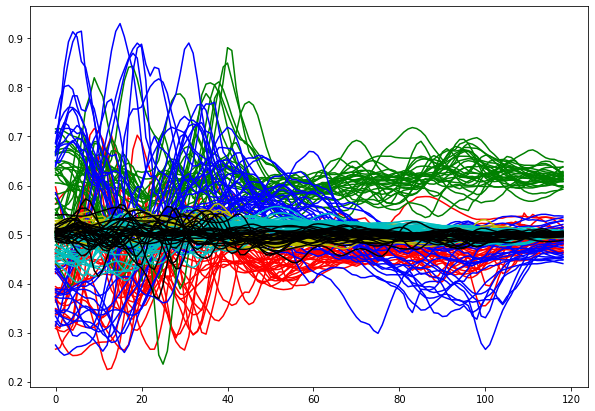

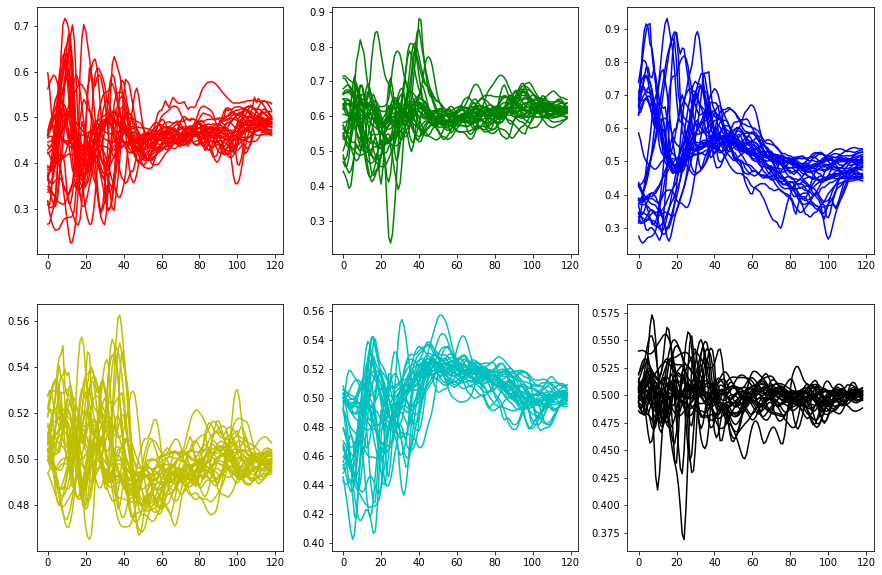

In [4]:
# 0번째 gesture 6채널 출력
idx = np.where( Y == 0)[0]
colors = ['r', 'g', 'b', 'y', 'c', 'k']
plt.figure(figsize=(10,7))
for i in range(6) :
    plt.plot(X[idx, :, i].T, colors[i] )
plt.show()

plt.figure(figsize=(15,10))
for i in range(6) :
    plt.subplot(2,3,i+1)
    plt.plot(X[idx, :, i].T, colors[i] )
plt.show()

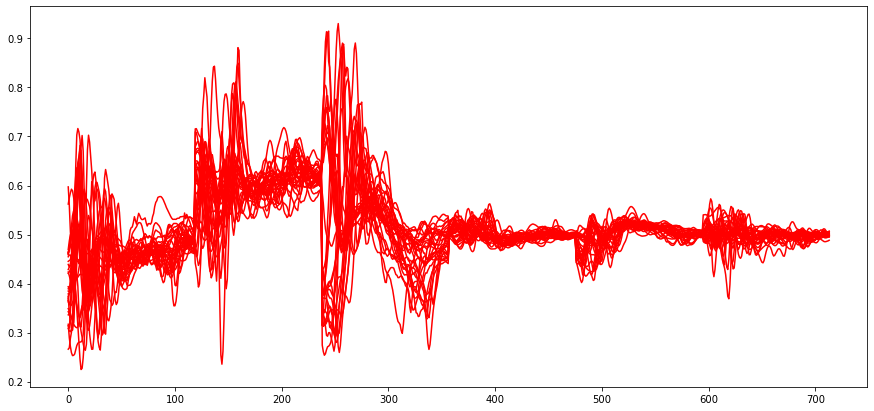

In [5]:
# 0 번째 gesture 신호 출력
plt.figure(figsize=(15,7))
for num in range(30) :
    idx = np.where( Y == 0)[0][num]   # 전체 40개가 아닌 5개만
    plt.plot(X[idx, :].T.flatten(), 'r' )

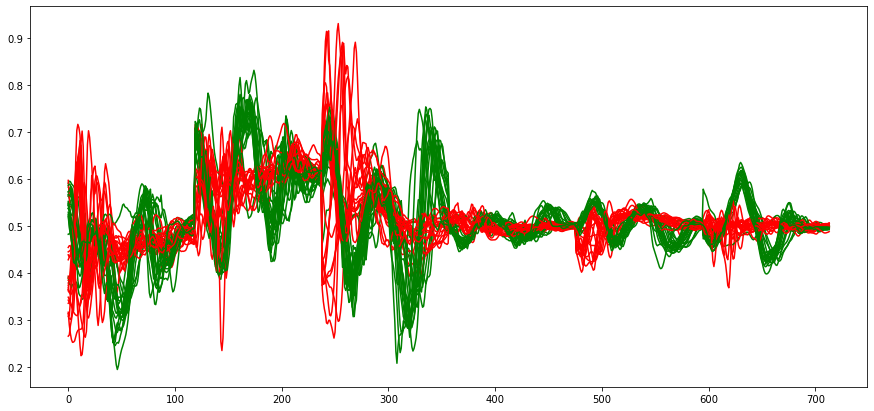

In [5]:
# 3개의 gesture 비교
plt.figure(figsize=(15,7))

for num in range(20) : # 1개의 gesture 당 10개
    idx = np.where( Y == 0)[0][num] 
    plt.plot(X[idx, :].T.flatten(), 'r' )

    idx = np.where( Y == 11)[0][num] 
    plt.plot(X[idx, :].T.flatten(), 'g' )

    
    

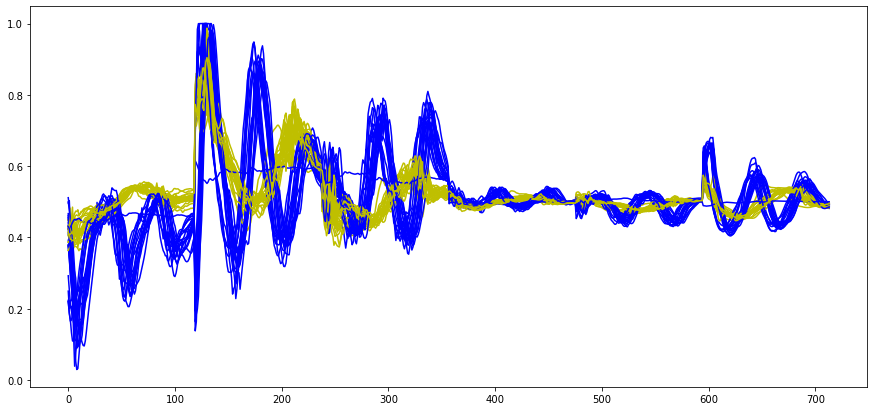

In [11]:
plt.figure(figsize=(15,7))

for num in range(20) : # 1개의 gesture 당 10개
    
    idx = np.where( Y == 18)[0][num] 
    plt.plot(X[idx, :].T.flatten(), 'b' )  
    
    idx = np.where( Y == 19)[0][num] 
    plt.plot(X[idx, :].T.flatten(), 'y' )  
